This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [12]:
import numpy as np
print(np.shape(train_data))
print(np.shape(train_data[0]))
print(np.shape(train_data[1]))
print(np.shape(train_labels))

(25000,)
(218,)
(189,)
(25000,)


In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 1s 0us/step


In [30]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [32]:
decoded_review_3 = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[3]])
print(decoded_review_3)

? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prota

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [19]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

2024-02-06 10:33:04.012258: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.7472 - val_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7766 - val_accuracy: 0.8647
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.8153 - val_accuracy: 0.8649
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 8.8176e-04 - accuracy: 1.0000 - val_loss: 0.8391 - val_accuracy: 0.8633
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.8905 - val_accuracy: 0.8640
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 5.5555e-04 - accuracy: 1.0000 - val_loss: 0.8904 - val_accuracy: 0.8633
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 4.4166e-04 - accuracy: 1.0000 - val_loss: 0.9230 - val_accuracy: 0.8612
Epoch 8

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

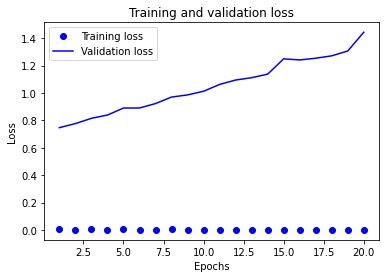

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

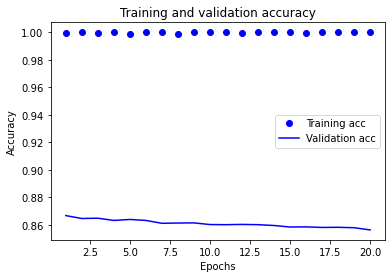

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [45]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_new = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5122 - accuracy: 0.7886 - val_loss: 0.3623 - val_accuracy: 0.9080
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.3036 - accuracy: 0.9061 - val_loss: 0.2370 - val_accuracy: 0.9299
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2227 - accuracy: 0.9266 - val_loss: 0.1963 - val_accuracy: 0.9317
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.8800


In [41]:
results

[0.29789817333221436, 0.8832399845123291]

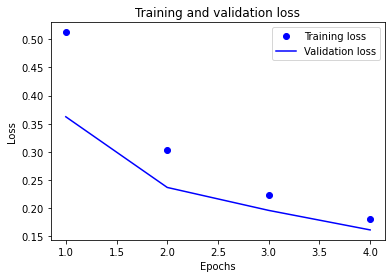

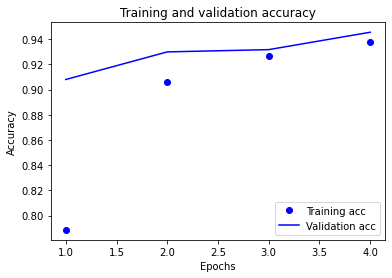

In [46]:
history_dict_new = history_new.history
loss_values_new = history_dict_new["loss"]
val_loss_values_new = history_dict_new["val_loss"]
epochs_new = range(1, len(loss_values_new) + 1)
plt.plot(epochs_new, loss_values_new, "bo", label="Training loss")
plt.plot(epochs_new, val_loss_values_new, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_new = history_dict_new["accuracy"]
val_acc_new = history_dict_new["val_accuracy"]
plt.plot(epochs_new, acc_new, "bo", label="Training acc")
plt.plot(epochs_new, val_acc_new, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Using a trained model to generate predictions on new data

In [47]:
model.predict(x_test)

array([[0.21744835],
       [0.9936528 ],
       [0.9575226 ],
       ...,
       [0.18573782],
       [0.12204082],
       [0.7211362 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [48]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [49]:
len(train_data)

8982

In [50]:
len(test_data)

2246

In [51]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [58]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [59]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [61]:
train_labels[0]

3

### Preparing the data

**Encoding the input data**

In [115]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [116]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [117]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [118]:
np.shape(y_train)

(8982, 46)

### Building your model

**Model definition**

In [119]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [120]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [121]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [122]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
16/16 [==============================] - 0s 13ms/step - loss: 2.5375 - accuracy: 0.4925 - val_loss: 1.6783 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 1.3882 - accuracy: 0.7081 - val_loss: 1.2974 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 1.0489 - accuracy: 0.7762 - val_loss: 1.1479 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.8363 - accuracy: 0.8234 - val_loss: 1.0372 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.8607 - val_loss: 0.9885 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5333 - accuracy: 0.8910 - val_loss: 0.9314 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4341 - accuracy: 0.9104 - val_loss: 0.9192 - val_accuracy: 0.8040
Epoch 8/20
16/16 [=

In [123]:
results

[1.3161510229110718, 0.7715939283370972]

**Plotting the training and validation loss**

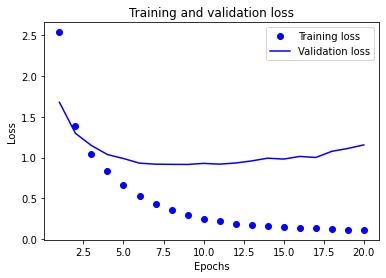

In [124]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

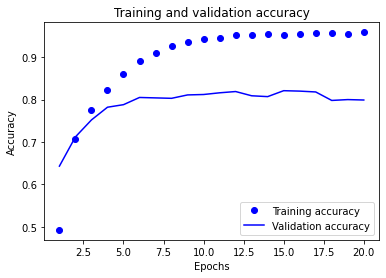

In [125]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [126]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 5ms/step - loss: 2.4585 - accuracy: 0.5267
Epoch 2/9
18/18 [==============================] - 0s 5ms/step - loss: 1.3342 - accuracy: 0.7174
Epoch 3/9
18/18 [==============================] - 0s 5ms/step - loss: 1.0035 - accuracy: 0.7871
Epoch 4/9
18/18 [==============================] - 0s 5ms/step - loss: 0.7863 - accuracy: 0.8313
Epoch 5/9
18/18 [==============================] - 0s 5ms/step - loss: 0.6230 - accuracy: 0.8666
Epoch 6/9
18/18 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.8942
Epoch 7/9
18/18 [==============================] - 0s 5ms/step - loss: 0.3990 - accuracy: 0.9161
Epoch 8/9
18/18 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.9299
Epoch 9/9
71/71 [==============================] - 0s 894us/step - loss: 0.9349 - accuracy: 0.7956


In [127]:
results

[0.9348642230033875, 0.7956367135047913]

In [128]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18076580587711488

### Generating predictions on new data

In [94]:
predictions = model.predict(x_test)

In [95]:
predictions[0].shape

(46,)

In [96]:
np.sum(predictions[0])

1.0000001

In [97]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [98]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [99]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [141]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
63/63 [==============================] - 1s 6ms/step - loss: 3.0943 - accuracy: 0.2700 - val_loss: 2.3589 - val_accuracy: 0.6380
Epoch 2/9
63/63 [==============================] - 0s 5ms/step - loss: 1.8058 - accuracy: 0.6590 - val_loss: 1.5265 - val_accuracy: 0.6540
Epoch 3/9
63/63 [==============================] - 0s 5ms/step - loss: 1.2959 - accuracy: 0.6809 - val_loss: 1.3597 - val_accuracy: 0.6680
Epoch 4/9
63/63 [==============================] - 0s 5ms/step - loss: 1.1267 - accuracy: 0.6991 - val_loss: 1.3341 - val_accuracy: 0.6820
Epoch 5/9
63/63 [==============================] - 0s 5ms/step - loss: 1.0157 - accuracy: 0.7315 - val_loss: 1.2929 - val_accuracy: 0.6940
Epoch 6/9
63/63 [==============================] - 0s 6ms/step - loss: 0.9267 - accuracy: 0.7549 - val_loss: 1.3123 - val_accuracy: 0.6930
Epoch 7/9
63/63 [==============================] - 0s 4ms/step - loss: 0.8510 - accuracy: 0.7736 - val_loss: 1.3312 - val_accuracy: 0.6970
Epoch 8/9
63/63 [==========

In [142]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
63/63 [==============================] - 0s 5ms/step - loss: 3.3165 - accuracy: 0.2146 - val_loss: 2.9582 - val_accuracy: 0.2230
Epoch 2/9
63/63 [==============================] - 0s 3ms/step - loss: 2.7467 - accuracy: 0.2167 - val_loss: 2.5599 - val_accuracy: 0.2230
Epoch 3/9
63/63 [==============================] - 0s 6ms/step - loss: 2.2276 - accuracy: 0.2689 - val_loss: 1.9772 - val_accuracy: 0.5310
Epoch 4/9
63/63 [==============================] - 0s 4ms/step - loss: 1.7092 - accuracy: 0.5466 - val_loss: 1.7011 - val_accuracy: 0.5420
Epoch 5/9
63/63 [==============================] - 0s 4ms/step - loss: 1.5492 - accuracy: 0.5610 - val_loss: 1.6784 - val_accuracy: 0.5450
Epoch 6/9
63/63 [==============================] - 0s 6ms/step - loss: 1.4839 - accuracy: 0.5641 - val_loss: 1.6685 - val_accuracy: 0.5460
Epoch 7/9
63/63 [==============================] - 0s 6ms/step - loss: 1.4331 - accuracy: 0.5628 - val_loss: 1.6628 - val_accuracy: 0.5480
Epoch 8/9
63/63 [==========

In [159]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
63/63 [==============================] - 0s 5ms/step - loss: 1.8341 - accuracy: 0.6438 - val_loss: 1.2246 - val_accuracy: 0.7340
Epoch 2/9
63/63 [==============================] - 0s 3ms/step - loss: 0.9302 - accuracy: 0.8059 - val_loss: 0.9616 - val_accuracy: 0.8000
Epoch 3/9
63/63 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.8715 - val_loss: 0.8646 - val_accuracy: 0.8220
Epoch 4/9
63/63 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.9048 - val_loss: 0.8078 - val_accuracy: 0.8270
Epoch 5/9
63/63 [==============================] - 0s 5ms/step - loss: 0.3350 - accuracy: 0.9283 - val_loss: 0.8067 - val_accuracy: 0.8300
Epoch 6/9
63/63 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.9405 - val_loss: 0.7990 - val_accuracy: 0.8340
Epoch 7/9
63/63 [==============================] - 0s 5ms/step - loss: 0.2164 - accuracy: 0.9479 - val_loss: 0.8389 - val_accuracy: 0.8230
Epoch 8/9
63/63 [==========

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [160]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 1us/step


In [161]:
train_data.shape

(404, 13)

In [162]:
test_data.shape

(102, 13)

In [163]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [165]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [166]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [167]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [168]:
all_scores

[1.9749850034713745, 2.497666835784912, 2.4325084686279297, 2.367483139038086]

In [169]:
np.mean(all_scores)

2.3181608617305756

**Saving the validation logs at each fold**

In [170]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [171]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

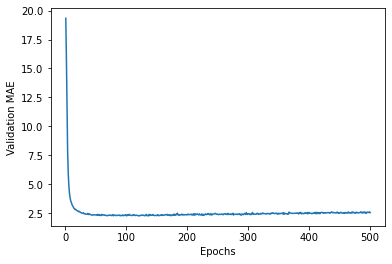

In [172]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

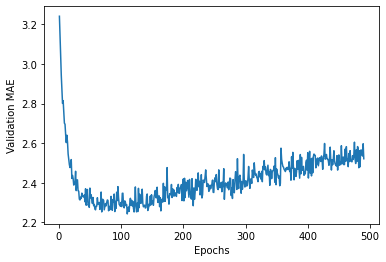

In [173]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [175]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 692us/step - loss: 15.8157 - mae: 2.5888


In [176]:
test_mae_score

2.588817596435547

### Generating predictions on new data

In [177]:
predictions = model.predict(test_data)
predictions[0]

array([9.887232], dtype=float32)

## Playing around, trying to juice out a better performance than a MAE of 2.589

In [188]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss=keras.losses.Huber(), metrics=["mae"])
    return model

In [189]:
k = 10
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

print(all_scores)
print(np.mean(all_scores))

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4
Processing fold #5
Processing fold #6
Processing fold #7
Processing fold #8
Processing fold #9
[1.8430248498916626, 1.5375295877456665, 2.116755962371826, 2.5177834033966064, 1.9677155017852783, 2.1301746368408203, 2.1416871547698975, 2.5601630210876465, 2.7574119567871094, 2.038536787033081]
2.1610782861709597


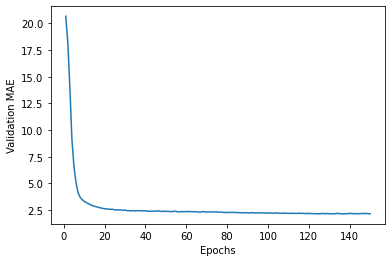

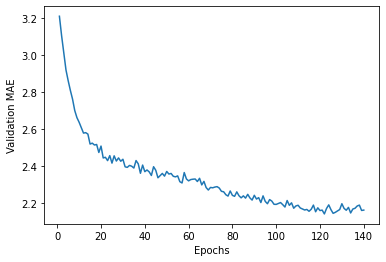

In [190]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [191]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=125, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 768us/step - loss: 2.3399 - mae: 2.8019
2.801870584487915


Some notes:
-default: MAE 2.589
-L128,L64,L64, ADAM: K10, BS16, 100EP --> MAE 2.176
-L128,L128,L64, ADAM: K10, BS16, 70EP --> MAE 2.515
-L64,L32, ADAM, Huber: K10, BS16, 125EP --> MAE 2.801

### Wrapping up

## Summary